In [32]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../tests/data/example.csv", parse_dates=True, index_col=0)
df.head()

,value
datetime,
2000-01-01 00:00:00,0.000000
2000-01-01 01:00:00,1.152781
2000-01-01 02:00:00,1.450556
2000-01-01 03:00:00,0.958643
2000-01-01 04:00:00,1.174895


In [16]:
series = df.value

In [17]:
type(series)

pandas.core.series.Series

# Range

In [18]:
from tsod.detectors import RangeDetector

rd = RangeDetector(min_value=0.0, max_value=2.0)

res = rd.detect(series)
series[res]

datetime
2000-01-01 13:00:00    3.0
2000-01-01 14:00:00    3.0
2000-01-03 07:00:00    2.5
Name: value, dtype: float64

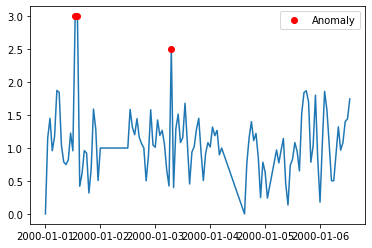

In [26]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Constant value

In [27]:
from tsod.detectors import ConstantValueDetector

cd = ConstantValueDetector()

res = cd.detect(series)
series[res]

datetime
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
Name: value, dtype: float64

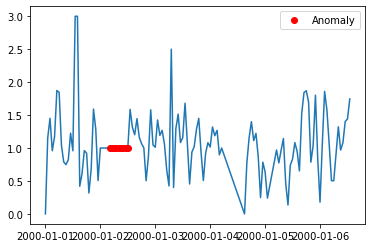

In [28]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Combination

In [46]:
from tsod.detectors import CombinedDetector

combined = CombinedDetector([RangeDetector(max_value=2.0),
                                     ConstantValueDetector()])

res = combined.detect(series)
series[res]

datetime
2000-01-01 13:00:00    3.0
2000-01-01 14:00:00    3.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
2000-01-03 07:00:00    2.5
Name: value, dtype: float64

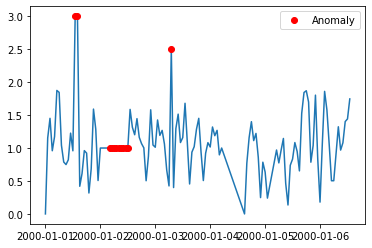

In [47]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Constant gradient

In [55]:
from tsod.detectors import ConstantGradientDetector

cgd = ConstantGradientDetector()

res = cgd.detect(series)

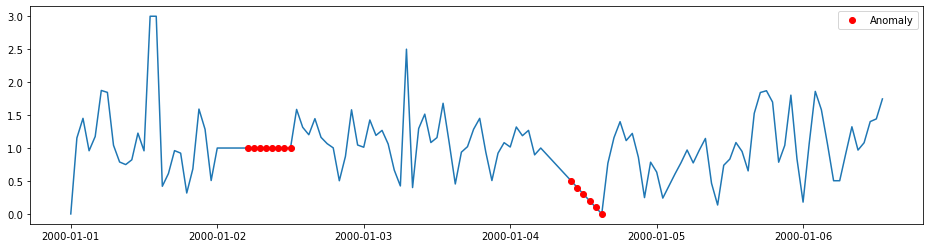

In [56]:
plt.figure(figsize=(16,4))
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()